# Variables

In [1]:
from __future__ import print_function
import mxnet
from mxnet import nd, autograd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from datetime import date
date.today()

datetime.date(2017, 12, 26)

In [3]:
author = "lambdaofgod. based on https://github.com/Kyubyong/pytorch_exercises"

In [4]:
mxnet.__version__

'0.12.1'

In [5]:
np.__version__

'1.12.1'

NOTE on notation

    _x, _y, _z, ...: NumPy 0-d or 1-d arrays
    _X, _Y, _Z, ...: NumPy 2-d or higer dimensional arrays
    x, y, z, ...: 0-d or 1-d tensors
    X, Y, Z, ...: 2-d or higher dimensional tensors


## Variables 

Q0. Create a variable `X` of the size (3, 2), filled with 1's.

In [6]:
X = nd.ones(shape=(3, 2))
print(X)


[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
<NDArray 3x2 @cpu(0)>


Q1. Get the tensor of Variable X.

In [7]:
X = nd.random_normal(shape=(3, 3))
print(X)


[[ 0.30030754  0.23107235  1.04932892]
 [-0.32433933 -0.0097888   0.73686236]
 [ 1.72023427  0.46656415 -1.07333767]]
<NDArray 3x3 @cpu(0)>


Q2. Complete the code.

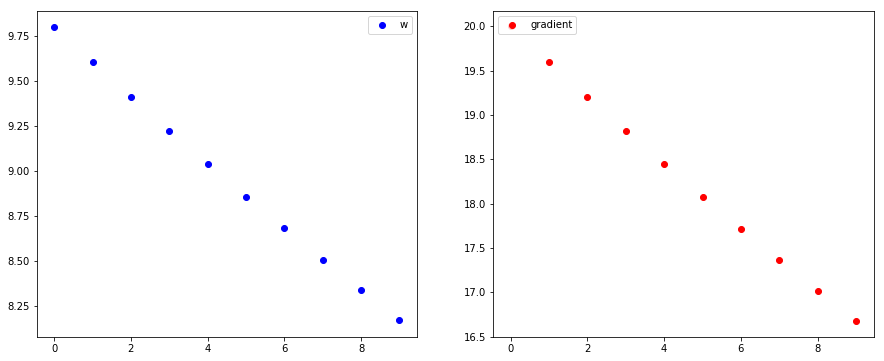

In [22]:
# Create a trainable variable `w` of scalar 10.
w = 10 * nd.ones(shape=(1,))
w.attach_grad()

gs, ws, grads = [], [], []
for i in range(10):
    with autograd.record():
      y = w ** 2 + 2
    
    # apply backpropagation to y.
    y.backward()
    
    w[:] -= 0.01 * w.grad
    
    gs.append(i)
    ws.append(w[0].asscalar())
    grads.append(w.grad[0].asscalar())

plt.figure(figsize=(15,6))
ax=plt.subplot(1, 2, 1)
ax.scatter(gs, ws, c="b", label="w")
ax.legend(loc="upper right")
ax=plt.subplot(1, 2, 2)
plt.scatter(gs, grads, c="r", label="gradient")
plt.legend(loc="upper left")
plt.show()

Q3. Complete the code. <br>This is adapted from `http://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_autograd.html`.

Epoch 010/500: loss 1199448.87500
Epoch 020/500: loss 261856.31250
Epoch 030/500: loss 87144.28906
Epoch 040/500: loss 35228.00391
Epoch 050/500: loss 15892.88770
Epoch 060/500: loss 7708.31494
Epoch 070/500: loss 3937.67749
Epoch 080/500: loss 2096.00879
Epoch 090/500: loss 1153.77307
Epoch 100/500: loss 653.37732
Epoch 110/500: loss 379.05869
Epoch 120/500: loss 224.50418
Epoch 130/500: loss 135.33827
Epoch 140/500: loss 82.82515
Epoch 150/500: loss 51.34477
Epoch 160/500: loss 32.18481
Epoch 170/500: loss 20.36802
Epoch 180/500: loss 12.99662
Epoch 190/500: loss 8.35244
Epoch 200/500: loss 5.40133
Epoch 210/500: loss 3.51201
Epoch 220/500: loss 2.29444
Epoch 230/500: loss 1.50535
Epoch 240/500: loss 0.99135
Epoch 250/500: loss 0.65499
Epoch 260/500: loss 0.43399
Epoch 270/500: loss 0.28851
Epoch 280/500: loss 0.19217
Epoch 290/500: loss 0.12829
Epoch 300/500: loss 0.08584
Epoch 310/500: loss 0.05756
Epoch 320/500: loss 0.03869
Epoch 330/500: loss 0.02608
Epoch 340/500: loss 0.01764


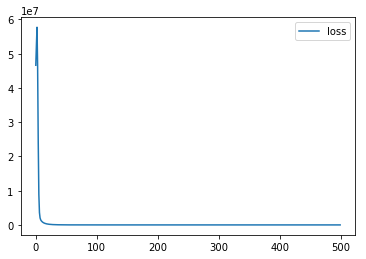

In [9]:
# Untrainable variables
# Create untrainable variables X and Y.
X = nd.random_normal(shape=(64, 1000))
Y = nd.random_normal(shape=(64, 10))
X.attach_grad()
Y.attach_grad()

# Trainable Variables
w1 = nd.random_normal(shape=(1000, 100))
w2 = nd.random_normal(shape=(100, 10))
w1.attach_grad()
w2.attach_grad()

# Parameters
n_epochs = 500
learning_rate = 1e-6
log_interval = 10

losses = []
for t in range(n_epochs):
    with autograd.record():
      Y_pred = (
        nd.dot(
          nd.dot(X, w1)
            .clip(a_min=0, a_max=np.inf),
        w2)
      )

      # Apply L2 loss to Y pred and Y.
      loss = ((Y_pred - Y) ** 2).sum()
    
    losses.append(loss[0].asscalar())

    loss.backward()
    
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad

    if (t + 1) % log_interval == 0:
        print("Epoch {:03d}/{:03d}: loss {:.5f}".format(
                t + 1, n_epochs, loss[0].asscalar()))

# plot
plt.figure()
plt.plot(losses, label="loss")
plt.legend()
plt.show()
